In [1]:
import torch
torch.__version__

'1.7.1+cpu'

### 基础使用方法

In [3]:
# 随机tensor,有点像numpy
x = torch.empty(5,3)
y = torch.rand(5,3)
z = torch.zeros(5,3,dtype=torch.long)
s = torch.tensor([5.5,3.5])
x.size()

torch.Size([5, 3])

#### 可直接相加

In [5]:
x+y,torch.add(x,y)

(tensor([[0.6839, 0.7004, 0.9513],
         [0.0231, 0.4561, 0.4640],
         [0.4635, 0.7035, 0.5459],
         [0.9857, 0.1854, 0.0547],
         [0.8560, 0.5874, 0.7390]]), tensor([[0.6839, 0.7004, 0.9513],
         [0.0231, 0.4561, 0.4640],
         [0.4635, 0.7035, 0.5459],
         [0.9857, 0.1854, 0.0547],
         [0.8560, 0.5874, 0.7390]]))

#### 索引

Vector、matrix（list of list）

In [9]:
x[:,2]

tensor([2.0179e-43, 0.0000e+00, 1.8888e+31, 0.0000e+00, 2.1019e-44])

In [13]:
# reshape
y.view(-1,1)

tensor([[0.0957],
        [0.4421],
        [0.3847],
        [0.4156],
        [0.8196],
        [0.9040],
        [0.3123],
        [0.4420],
        [0.0369],
        [0.9077],
        [0.1878],
        [0.0222],
        [0.6215],
        [0.4974],
        [0.7866]])

#### 与Numpy 交互计算

In [14]:
# tensor 2 numpy
a = torch.ones(5)
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [15]:
import numpy as np
# numpy 2 tensor
a = np.ones(5)
b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

### 反向传播，梯度自动计算

In [6]:
import torch

# 第一种方法
x = torch.randn(3,4,requires_grad=True)   # 定义可以求导的value
x

tensor([[-0.4411, -0.7054, -0.5804,  0.6643],
        [ 0.8642,  0.5215,  0.9851, -0.4942],
        [-1.8292, -0.0555, -0.5832,  1.4586]], requires_grad=True)

In [7]:
# 第二种方法
x = torch.randn(3,4)
x.requires_grad = True  # 定义可以求导的value
x 

tensor([[ 1.0823,  0.5205, -0.2760,  0.4135],
        [-0.0630,  1.1302, -0.6614,  1.1004],
        [-0.1012,  1.8174,  2.9057,  1.6849]], requires_grad=True)

In [8]:
b = torch.randn(3,4,requires_grad=True)
t = x + b
y = t.sum()
y.backward()  # 反向传播

In [10]:
b.grad

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [11]:
x.requires_grad,b.requires_grad,t.requires_grad

(True, True, True)

### 举个例子
wx + b = z
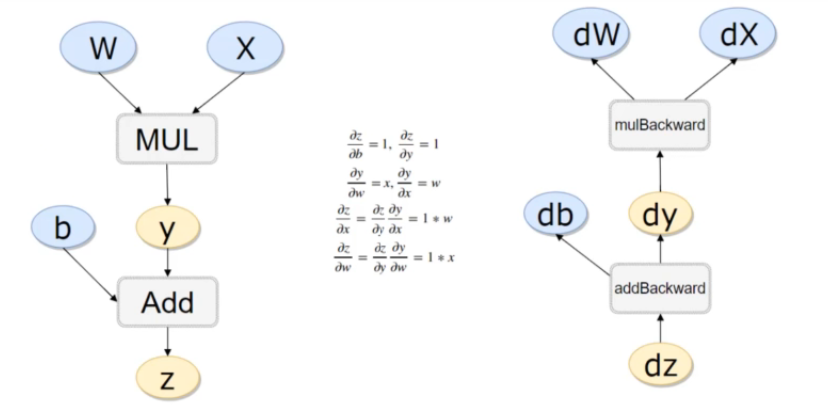

In [13]:
x = torch.rand(1)  # 不设requires_grad
w = torch.rand(1,requires_grad=True)
b = torch.rand(1,requires_grad=True)
y = w * x
z = y + b

In [14]:
x.requires_grad,w.requires_grad,b.requires_grad,y.requires_grad,z.requires_grad   # 判断是否需要求导

(False, True, True, True, True)

In [23]:
x.is_leaf,w.is_leaf,b.is_leaf,y.is_leaf,z.is_leaf   # 判断是否是叶子节点

(True, True, True, False, False)

In [29]:
z.backward(retain_graph=True)  # 如果不清零，w、b会累加

In [30]:
w.grad  # z每次反向传播会累加

tensor([3.5114])

In [31]:
b.grad  # z每次反向传播会累加

tensor([4.])

#### 线性回归模型

In [36]:
x_values = [i for i in range(11)]
x_train = np.array(x_values,dtype=np.float32) # ndarray格式
x_train = x_train.reshape(-1,1)
x_train.shape

(11, 1)

In [37]:
y_values = [2*i+1 for i in x_values]
y_train = np.array(y_values,dtype=np.float32)
y_train = y_train.reshape(-1,1)
y_train.shape

(11, 1)

In [2]:
import torch
import torch.nn as nn

In [3]:
class LinearRegressionModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegressionModel,self).__init__()   # 继成
        self.linear = nn.Linear(input_dim,output_dim)   # 全连接层的输入输出维度
    def forward(self,x):
        # 前向传播
        x = torch.tensor(x) # 还是要加
        out = self.linear(x)
        return out

In [102]:
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim,output_dim)

# 是否有gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 1000
learining_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr=learining_rate) # 优化，model.parameters()自动识别requires_grad=True的参数
criterion = nn.MSELoss()  # 定义损失函数

In [103]:
model

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [104]:
for epoch in range(epochs):
    
    inputs = torch.from_numpy(x_train).to(device)  # 有gpu加to(device)
    labels = torch.from_numpy(y_train).to(device)

    optimizer.zero_grad()   # 清空梯度
    outputs = model(inputs)
    loss = criterion(outputs,labels) # 损失函数的计算
    
    loss.backward()   # 反向传播
    
    # 参数更新
    optimizer.step()
    
    if epoch % 50 == 0:
        print('epoch {},loss {}'.format(epoch,loss))

epoch 0,loss 193.12611389160156
epoch 50,loss 0.036327019333839417
epoch 100,loss 0.0207196231931448
epoch 150,loss 0.01181765552610159
epoch 200,loss 0.006740359589457512
epoch 250,loss 0.0038444348610937595
epoch 300,loss 0.0021927275229245424
epoch 350,loss 0.0012506579514592886
epoch 400,loss 0.0007133125909604132
epoch 450,loss 0.00040685906424187124
epoch 500,loss 0.00023205963952932507
epoch 550,loss 0.00013235598453320563
epoch 600,loss 7.548881694674492e-05
epoch 650,loss 4.305451875552535e-05
epoch 700,loss 2.4559918529121205e-05
epoch 750,loss 1.4005257071403321e-05
epoch 800,loss 7.987899152794853e-06
epoch 850,loss 4.555948180495761e-06
epoch 900,loss 2.598998889880022e-06
epoch 950,loss 1.482122684137721e-06


In [105]:
predicted = model(torch.from_numpy(x_train).requires_grad_().data.numpy())
predicted

tensor([[ 0.9983],
        [ 2.9985],
        [ 4.9988],
        [ 6.9990],
        [ 8.9993],
        [10.9995],
        [12.9998],
        [15.0000],
        [17.0003],
        [19.0005],
        [21.0008]], grad_fn=<AddmmBackward>)

In [39]:
torch.save(model.state_dict(),'model.pkl')

In [40]:
model.load_state_dict(torch.load('model.pkl'))

<All keys matched successfully>

### Tensor 常见的形式有哪些

0：scalar # 一个值 torch.Tensor(5.2) <br>
1：vector # torch.Tensor([5,2]) <br>
2： Matrix # torch.Tensor([[1,2,3],[3,4,5]]) <br>
3：多维Tensor